# Linear Regression
* Attempts to establis how x causes y

## Correlation vs regression
### Similarities
* Quantifies the direction and strength of the relationship
### Differences
* Correlatiob is a single statistics
* Linear regresion produces an equation

In [1]:
import pandas as pd
import pandas_datareader as pdr
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
import datetime as dt
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>


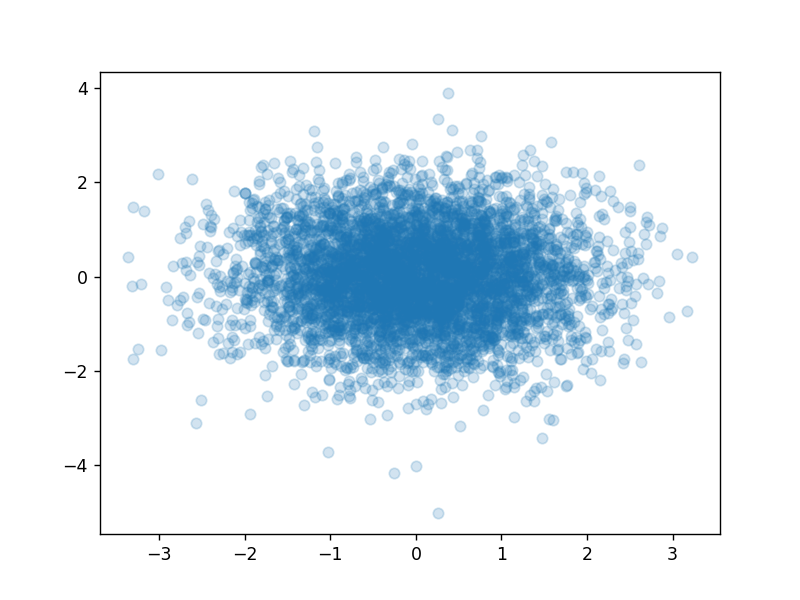

In [2]:
X = np.random.randn(5000)
Y=np.random.randn(5000)
fig,ax=plt.subplots()
ax.scatter(X,Y,alpha=.2)

In [3]:
ticker=['AAPL','TSLA','MSFT','IBM','^GSPC']
start= dt.datetime(2022,1,1)
data=pdr.get_data_yahoo(ticker,start)

In [4]:
data.head()

Attributes   Adj Close                                                   \
Symbols           AAPL        TSLA        MSFT         IBM        ^GSPC   
Date                                                                      
2021-12-31  176.838257  352.260010  334.136932  128.862717  4766.180176   
2022-01-03  181.259918  399.926666  332.577087  131.157272  4796.560059   
2022-01-04  178.959442  383.196655  326.874359  133.066223  4793.540039   
2022-01-05  174.199158  362.706665  314.326324  133.259048  4700.580078   
2022-01-06  171.291183  354.899994  311.842560  130.482407  4696.049805   

Attributes       Close                                                   ...  \
Symbols           AAPL        TSLA        MSFT         IBM        ^GSPC  ...   
Date                                                                     ...   
2021-12-31  177.570007  352.260010  336.320007  133.660004  4766.180176  ...   
2022-01-03  182.009995  399.926666  334.750000  136.039993  4796.560059  ...   
2022-01-04  179.699997  383.196655  329.010010  138.020004  4793.540039  ...   
2022-01-05  174.919998  362.706665  316.380005  138.220001  4700.580078  ...   
2022-01-06  172.000000  354.899994  313.880005  135.339996  4696.049805  ...   

Attributes        Open                                                   \
Symbols           AAPL        TSLA        MSFT         IBM        ^GSPC   
Date                                                                      
2021-12-31  178.089996  357.813324  338.510010  134.000000  4775.209961   
2022-01-03  177.830002  382.583344  335.350006  134.070007  4778.140137   
2022-01-04  182.630005  396.516663  334.829987  136.100006  4804.509766   
2022-01-05  179.610001  382.216675  325.859985  138.309998  4787.990234   
2022-01-06  172.699997  359.000000  313.149994  138.199997  4693.390137   

Attributes       Volume                                                    
Symbols            AAPL         TSLA        MSFT        IBM         ^GSPC  
Date                                                                       
2021-12-31   64062300.0   40733700.0  18000800.0  3362100.0  2.446190e+09  
2022-01-03  104487900.0  103931400.0  28865100.0  4605900.0  2.775190e+09  
2022-01-04   99310400.0  100248300.0  32674300.0  7300000.0  3.641050e+09  
2022-01-05   94537600.0   80119800.0  40054300.0  8956900.0  3.733540e+09  
2022-01-06   96904000.0   90336600.0  39646100.0  9908100.0  3.371250e+09  

[5 rows x 30 columns]

In [5]:
data=data['Adj Close']

In [6]:
data

Symbols,AAPL,TSLA,MSFT,IBM,^GSPC
Date,,,,,
2021-12-31,176.838257,352.260010,334.136932,128.862717,4766.180176
2022-01-03,181.259918,399.926666,332.577087,131.157272,4796.560059
2022-01-04,178.959442,383.196655,326.874359,133.066223,4793.540039
2022-01-05,174.199158,362.706665,314.326324,133.259048,4700.580078
2022-01-06,171.291183,354.899994,311.842560,130.482407,4696.049805
...,...,...,...,...,...
2022-10-14,138.380005,204.990005,228.559998,120.040001,3583.070068
2022-10-17,142.410004,219.350006,237.529999,121.519997,3677.949951
2022-10-18,143.750000,220.190002,238.500000,122.940002,3719.979980


In [7]:
log_return=np.log(data/data.shift())

In [8]:
log_return

Symbols,AAPL,TSLA,MSFT,IBM,^GSPC
Date,,,,,
2021-12-31,NaN,NaN,NaN,NaN,NaN
2022-01-03,0.024697,0.126912,-0.004679,0.017650,0.006354
2022-01-04,-0.012773,-0.042733,-0.017296,0.014450,-0.000630
2022-01-05,-0.026960,-0.054954,-0.039144,0.001448,-0.019583
2022-01-06,-0.016834,-0.021758,-0.007933,-0.021057,-0.000964
...,...,...,...,...,...
2022-10-14,-0.032771,-0.078454,-0.024548,-0.014473,-0.023947
2022-10-17,0.028707,0.067707,0.038495,0.012254,0.026136
2022-10-18,0.009365,0.003822,0.004075,0.011618,0.011363


In [9]:
ticker_a='AAPL'
ticker_b='^GSPC'
def lin_reg(ticker_a,ticker_b):
    X=log_return[ticker_a].iloc[1:].to_numpy().reshape(-1,1)
    Y = log_return[ticker_b].iloc[1:].to_numpy().reshape(-1,1)

    lin_reg=LinearRegression()
    lin_reg.fit(X,Y)

    Y_pred=lin_reg.predict(X)

    alpha=lin_reg.intercept_[0]
    beta=lin_reg.coef_[0,0]
    fig,ax=plt.subplots()
    ax.set_title("Alpha:"+str(round(alpha,5))+" ,Beta:"+str(round(beta,3)))
    ax.scatter(X,Y)
    ax.plot(X,Y_pred,c='red')

In [10]:
X


array([ 1.04052055, -0.00586602, -1.14492661, ..., -0.094232  ,
       -0.35196743, -0.4664936 ])

<IPython.core.display.Javascript object>


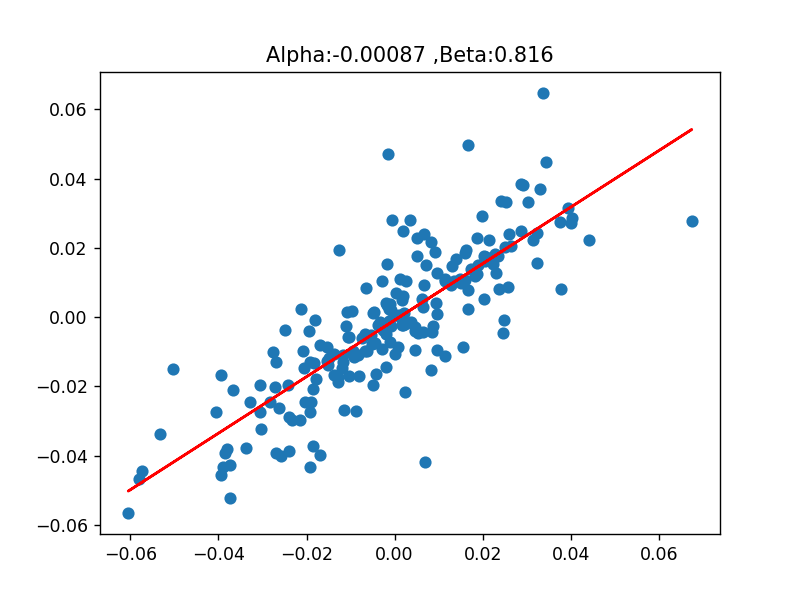

In [12]:
lin_reg("AAPL","MSFT")